In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\pandas\online_furniture_retailer.csv")

In [3]:
df.head()

,product_category,product_subcategory,brand,delivery_status,assembly_service_requested,payment_method,order_id,customer_id,product_price,shipping_cost,assembly_cost,total_amount,delivery_window_days,customer_rating
0,Outdoor,Patio Set,World Market,Failed Delivery,True,Credit Card,93810,2824,191.27,45.63,86.82,323.72,11,3.2
1,Living Room,Sofa,West Elm,Cancelled,True,Apple Pay,13278,5506,702.87,52.65,183.07,938.59,10,4.5
2,Dining Room,Bar Stool,Ashley Furniture,Delivered,False,Cash on Delivery,42098,4657,395.41,96.79,0.00,492.20,2,NaN
3,Dining Room,China Cabinet,HomeGoods,Pending,False,Google Pay,28289,2679,602.59,0.00,0.00,602.59,9,NaN
4,Dining Room,China Cabinet,CB2,Pending,True,Apple Pay,98696,9935,1782.36,69.23,41.53,1893.12,13,1.3


In [4]:
df.shape

(1938, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category            1938 non-null   object 
 1   product_subcategory         1938 non-null   object 
 2   brand                       1842 non-null   object 
 3   delivery_status             1938 non-null   object 
 4   assembly_service_requested  1938 non-null   bool   
 5   payment_method              1938 non-null   object 
 6   order_id                    1938 non-null   int64  
 7   customer_id                 1938 non-null   int64  
 8   product_price               1938 non-null   float64
 9   shipping_cost               1880 non-null   float64
 10  assembly_cost               1900 non-null   float64
 11  total_amount                1938 non-null   float64
 12  delivery_window_days        1938 non-null   int64  
 13  customer_rating             1658 

In [6]:
df.isna().sum()

product_category                0
product_subcategory             0
brand                          96
delivery_status                 0
assembly_service_requested      0
payment_method                  0
order_id                        0
customer_id                     0
product_price                   0
shipping_cost                  58
assembly_cost                  38
total_amount                    0
delivery_window_days            0
customer_rating               280
dtype: int64

In [7]:
df.dropna(subset=['brand','shipping_cost'],inplace=True)

In [8]:
df[['customer_rating','assembly_cost']].mean()

customer_rating     3.060000
assembly_cost      61.914963
dtype: float64

In [9]:
df.fillna({'customer_rating':3.0,'assembly_cost':61.7},inplace=True)

In [10]:
df.isna().sum()

product_category              0
product_subcategory           0
brand                         0
delivery_status               0
assembly_service_requested    0
payment_method                0
order_id                      0
customer_id                   0
product_price                 0
shipping_cost                 0
assembly_cost                 0
total_amount                  0
delivery_window_days          0
customer_rating               0
dtype: int64

In [11]:
df[df.duplicated()]

,product_category,product_subcategory,brand,delivery_status,assembly_service_requested,payment_method,order_id,customer_id,product_price,shipping_cost,assembly_cost,total_amount,delivery_window_days,customer_rating


In [12]:
df.describe()

,order_id,customer_id,product_price,shipping_cost,assembly_cost,total_amount,delivery_window_days,customer_rating
count,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000
mean,55156.473094,5599.540919,1149.654378,69.550807,61.910987,1281.291659,7.532511,3.051457
std,25910.172865,2604.746736,657.185837,47.692944,81.230478,667.795354,3.956445,1.068610
min,10053.000000,1009.000000,81.430000,0.000000,0.000000,146.930000,1.000000,1.000000
25%,31908.000000,3295.250000,604.465000,31.672500,0.000000,716.617500,4.000000,2.300000
50%,54434.000000,5703.000000,1066.960000,74.065000,27.040000,1210.410000,8.000000,3.000000
75%,77960.000000,7865.750000,1611.342500,107.735000,98.795000,1746.242500,11.000000,3.900000
max,99952.000000,9998.000000,2979.560000,150.000000,299.350000,3092.570000,14.000000,5.000000


1.in which category do people order the most furniture?

<Axes: xlabel='product_category'>

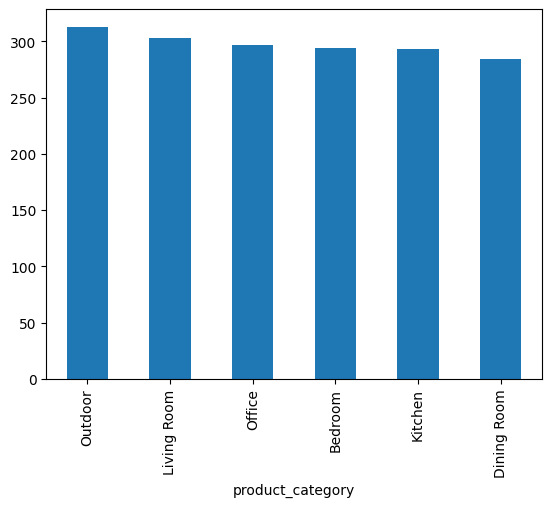

In [13]:
df['product_category'].value_counts().plot(kind='bar')

2. which product category has the highest average price,shipping cost and assembly cost ?

In [14]:
df.groupby('product_category')[['shipping_cost','product_price','assembly_cost']].mean()

,shipping_cost,product_price,assembly_cost
product_category,,,
Bedroom,69.261293,1498.773878,56.520306
Dining Room,68.173873,987.702183,55.630035
Kitchen,69.585461,1355.399898,62.732321
Living Room,65.786733,1301.798878,66.397228
Office,69.600707,777.571380,60.406397
Outdoor,74.636134,981.854760,68.989361


3. what is the range of product prices?

In [15]:
df['product_price'].min(),df['product_price'].max()

(np.float64(81.43), np.float64(2979.56))

4. which product category have the highest sales?

In [16]:
df.groupby('product_category')['total_amount'].sum()

product_category
Bedroom        477657.25
Dining Room    315623.00
Kitchen        435777.88
Living Room    434536.31
Office         269922.36
Outdoor        352307.52
Name: total_amount, dtype: float64

5.which product subcategories are most popular?

In [17]:
a=df['product_subcategory'].value_counts()
a

product_subcategory
Bar Cart            81
Pantry Cabinet      79
Garden Chair        74
Dining Chair        70
Kitchen Island      68
Office Chair        66
Lounge Chair        66
Desk                65
Kitchen Cabinet     65
Outdoor Table       64
Dining Table        63
Bookshelf           62
Umbrella            61
Mattress            60
Sofa                59
China Cabinet       57
Computer Table      56
Ottoman             56
Buffet              55
TV Stand            50
Bed Frame           49
Chest of Drawers    49
Dresser             49
Nightstand          49
Patio Set           48
Filing Cabinet      48
Coffee Table        48
Side Table          45
Armchair            45
Bar Stool           39
Wardrobe            38
Name: count, dtype: int64

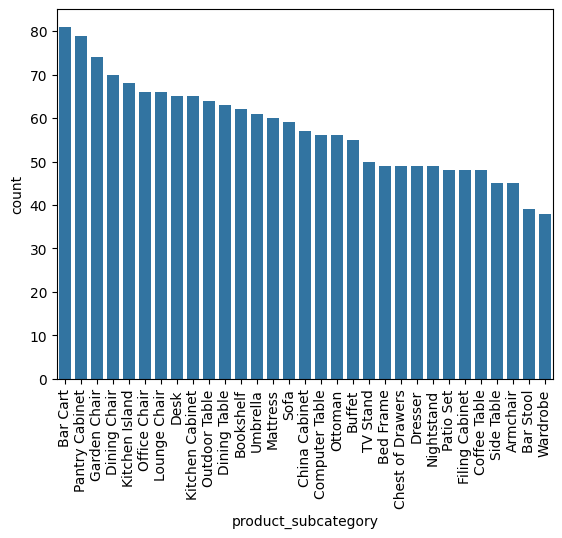

In [18]:
sns.barplot(x=a.index,y=a)
plt.xticks(rotation=90)
plt.show()

6. which payment method is most used?

In [19]:
b=df['payment_method'].value_counts()
b

payment_method
Apple Pay           274
Credit Card         266
Cash on Delivery    266
Debit Card          265
Google Pay          251
Bank Transfer       236
PayPal              226
Name: count, dtype: int64

Text(0, 0.5, ' ')

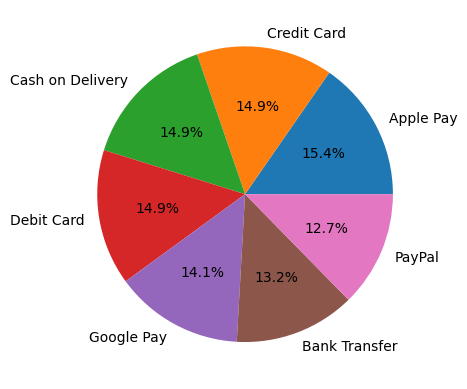

In [20]:
b.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel(" ")

7. who are the top 10 customers

Text(0.5, 1.0, 'Top 10 customer')

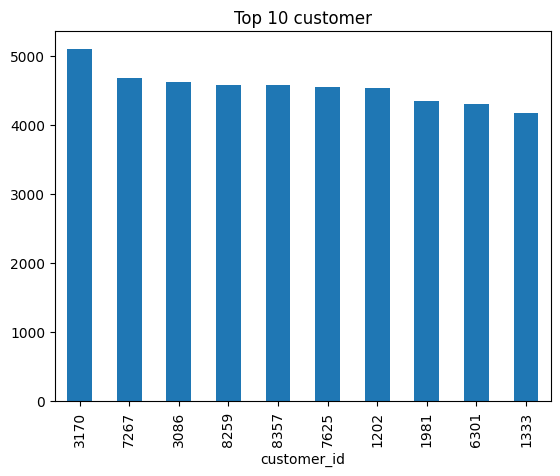

In [21]:
df.groupby('customer_id')['total_amount'].sum().nlargest(10).plot(kind='bar')
plt.title('Top 10 customer')

8.what is the avarage order value across different categories?

<Axes: xlabel='product_category', ylabel='total_amount'>

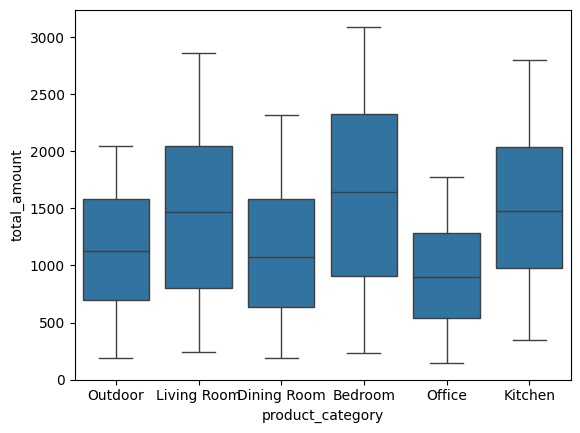

In [22]:
sns.boxplot(x='product_category',y='total_amount',data=df)


9.delivery status analysis

<Axes: xlabel='delivery_status'>

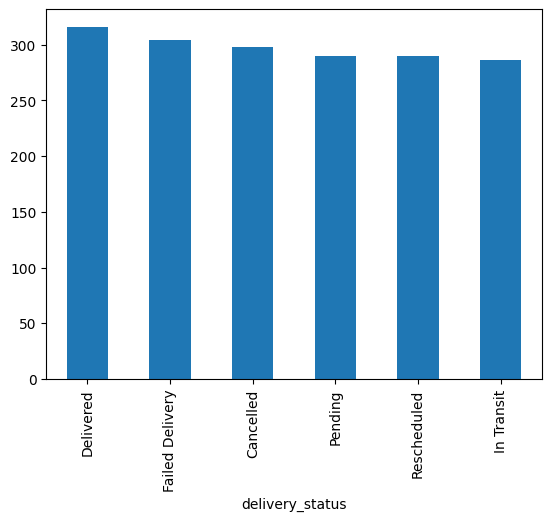

In [23]:
df['delivery_status'].value_counts().plot(kind='bar')

10.customer rating visualisation

<Axes: xlabel='customer_rating', ylabel='Count'>

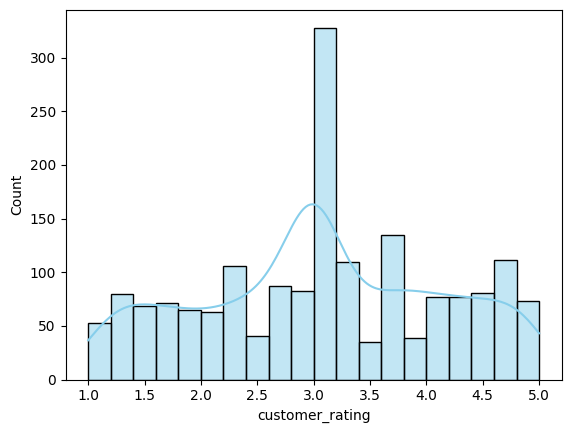

In [24]:
sns.histplot(df["customer_rating"], bins=20, kde=True, color='skyblue')

11.relationship b/w product price and customer rating

Text(0.5, 1.0, 'Product price v/s Customer rating')

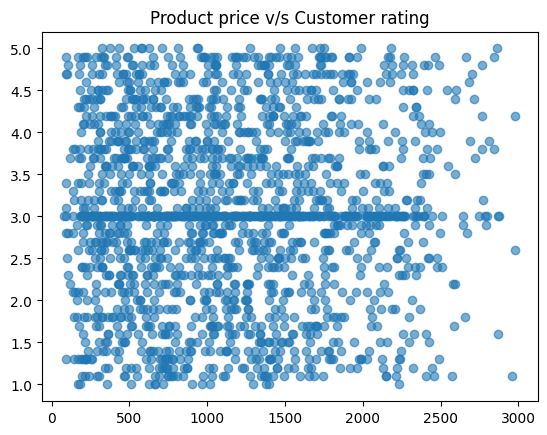

In [25]:
plt.scatter(df['product_price'],df['customer_rating'],alpha=0.6)
plt.title('Product price v/s Customer rating')

12. does assembly service request affect customer rating

<Axes: xlabel='assembly_service_requested', ylabel='customer_rating'>

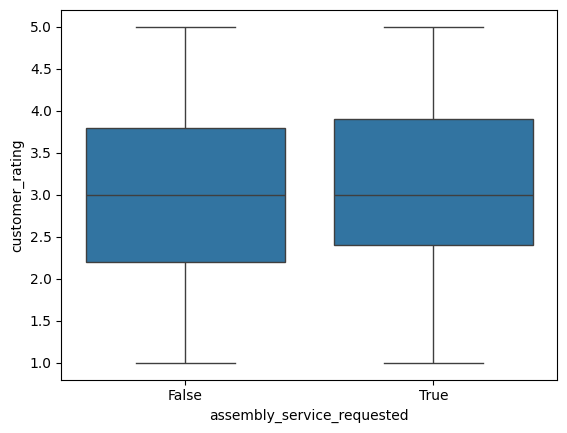

In [26]:
sns.boxplot(x='assembly_service_requested',y='customer_rating',data=df)

13.what is the relationship b/w product price,shipping cost and total amount?

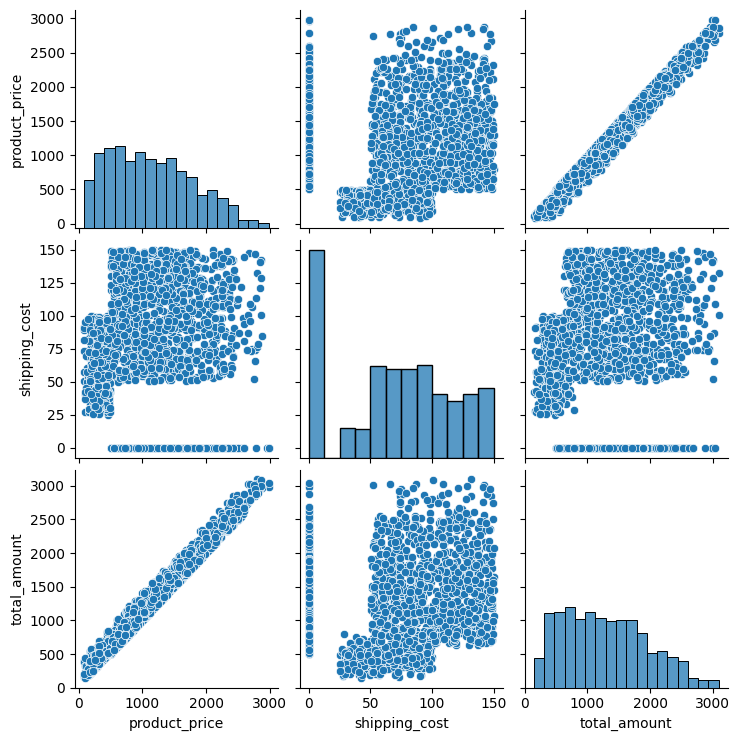

In [27]:
sns.pairplot(df[['product_price','shipping_cost','total_amount']])

In [28]:
df[['product_price','shipping_cost','total_amount']].corr()


,product_price,shipping_cost,total_amount
product_price,1.000000,0.047281,0.989613
shipping_cost,0.047281,1.000000,0.120933
total_amount,0.989613,0.120933,1.000000


14.which brand are most popular and profitable?

Text(0.5, 1.0, 'Most popular 10 brands')

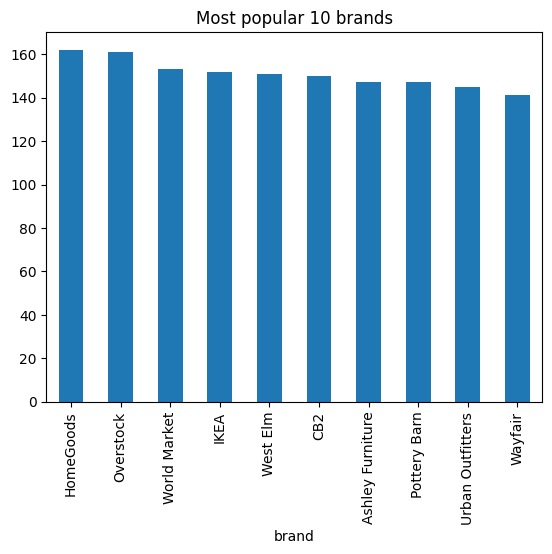

In [29]:
df['brand'].value_counts().head(10).plot(kind='bar')
plt.title('Most popular 10 brands')

Text(0.5, 1.0, 'Most profitable brand')

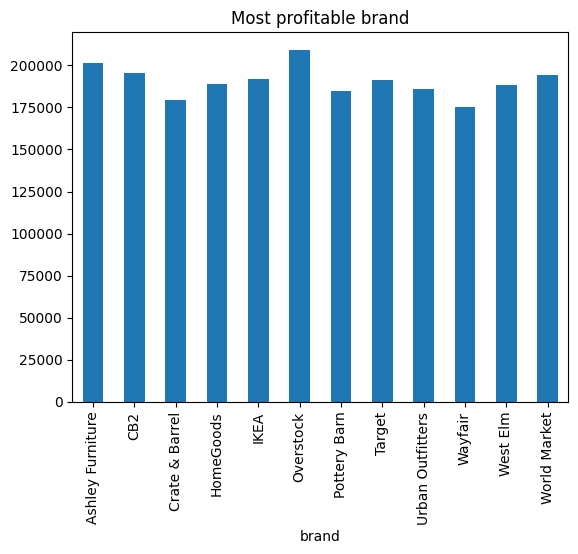

In [30]:
df.groupby('brand')['total_amount'].sum().plot(kind='bar')
plt.title('Most profitable brand')

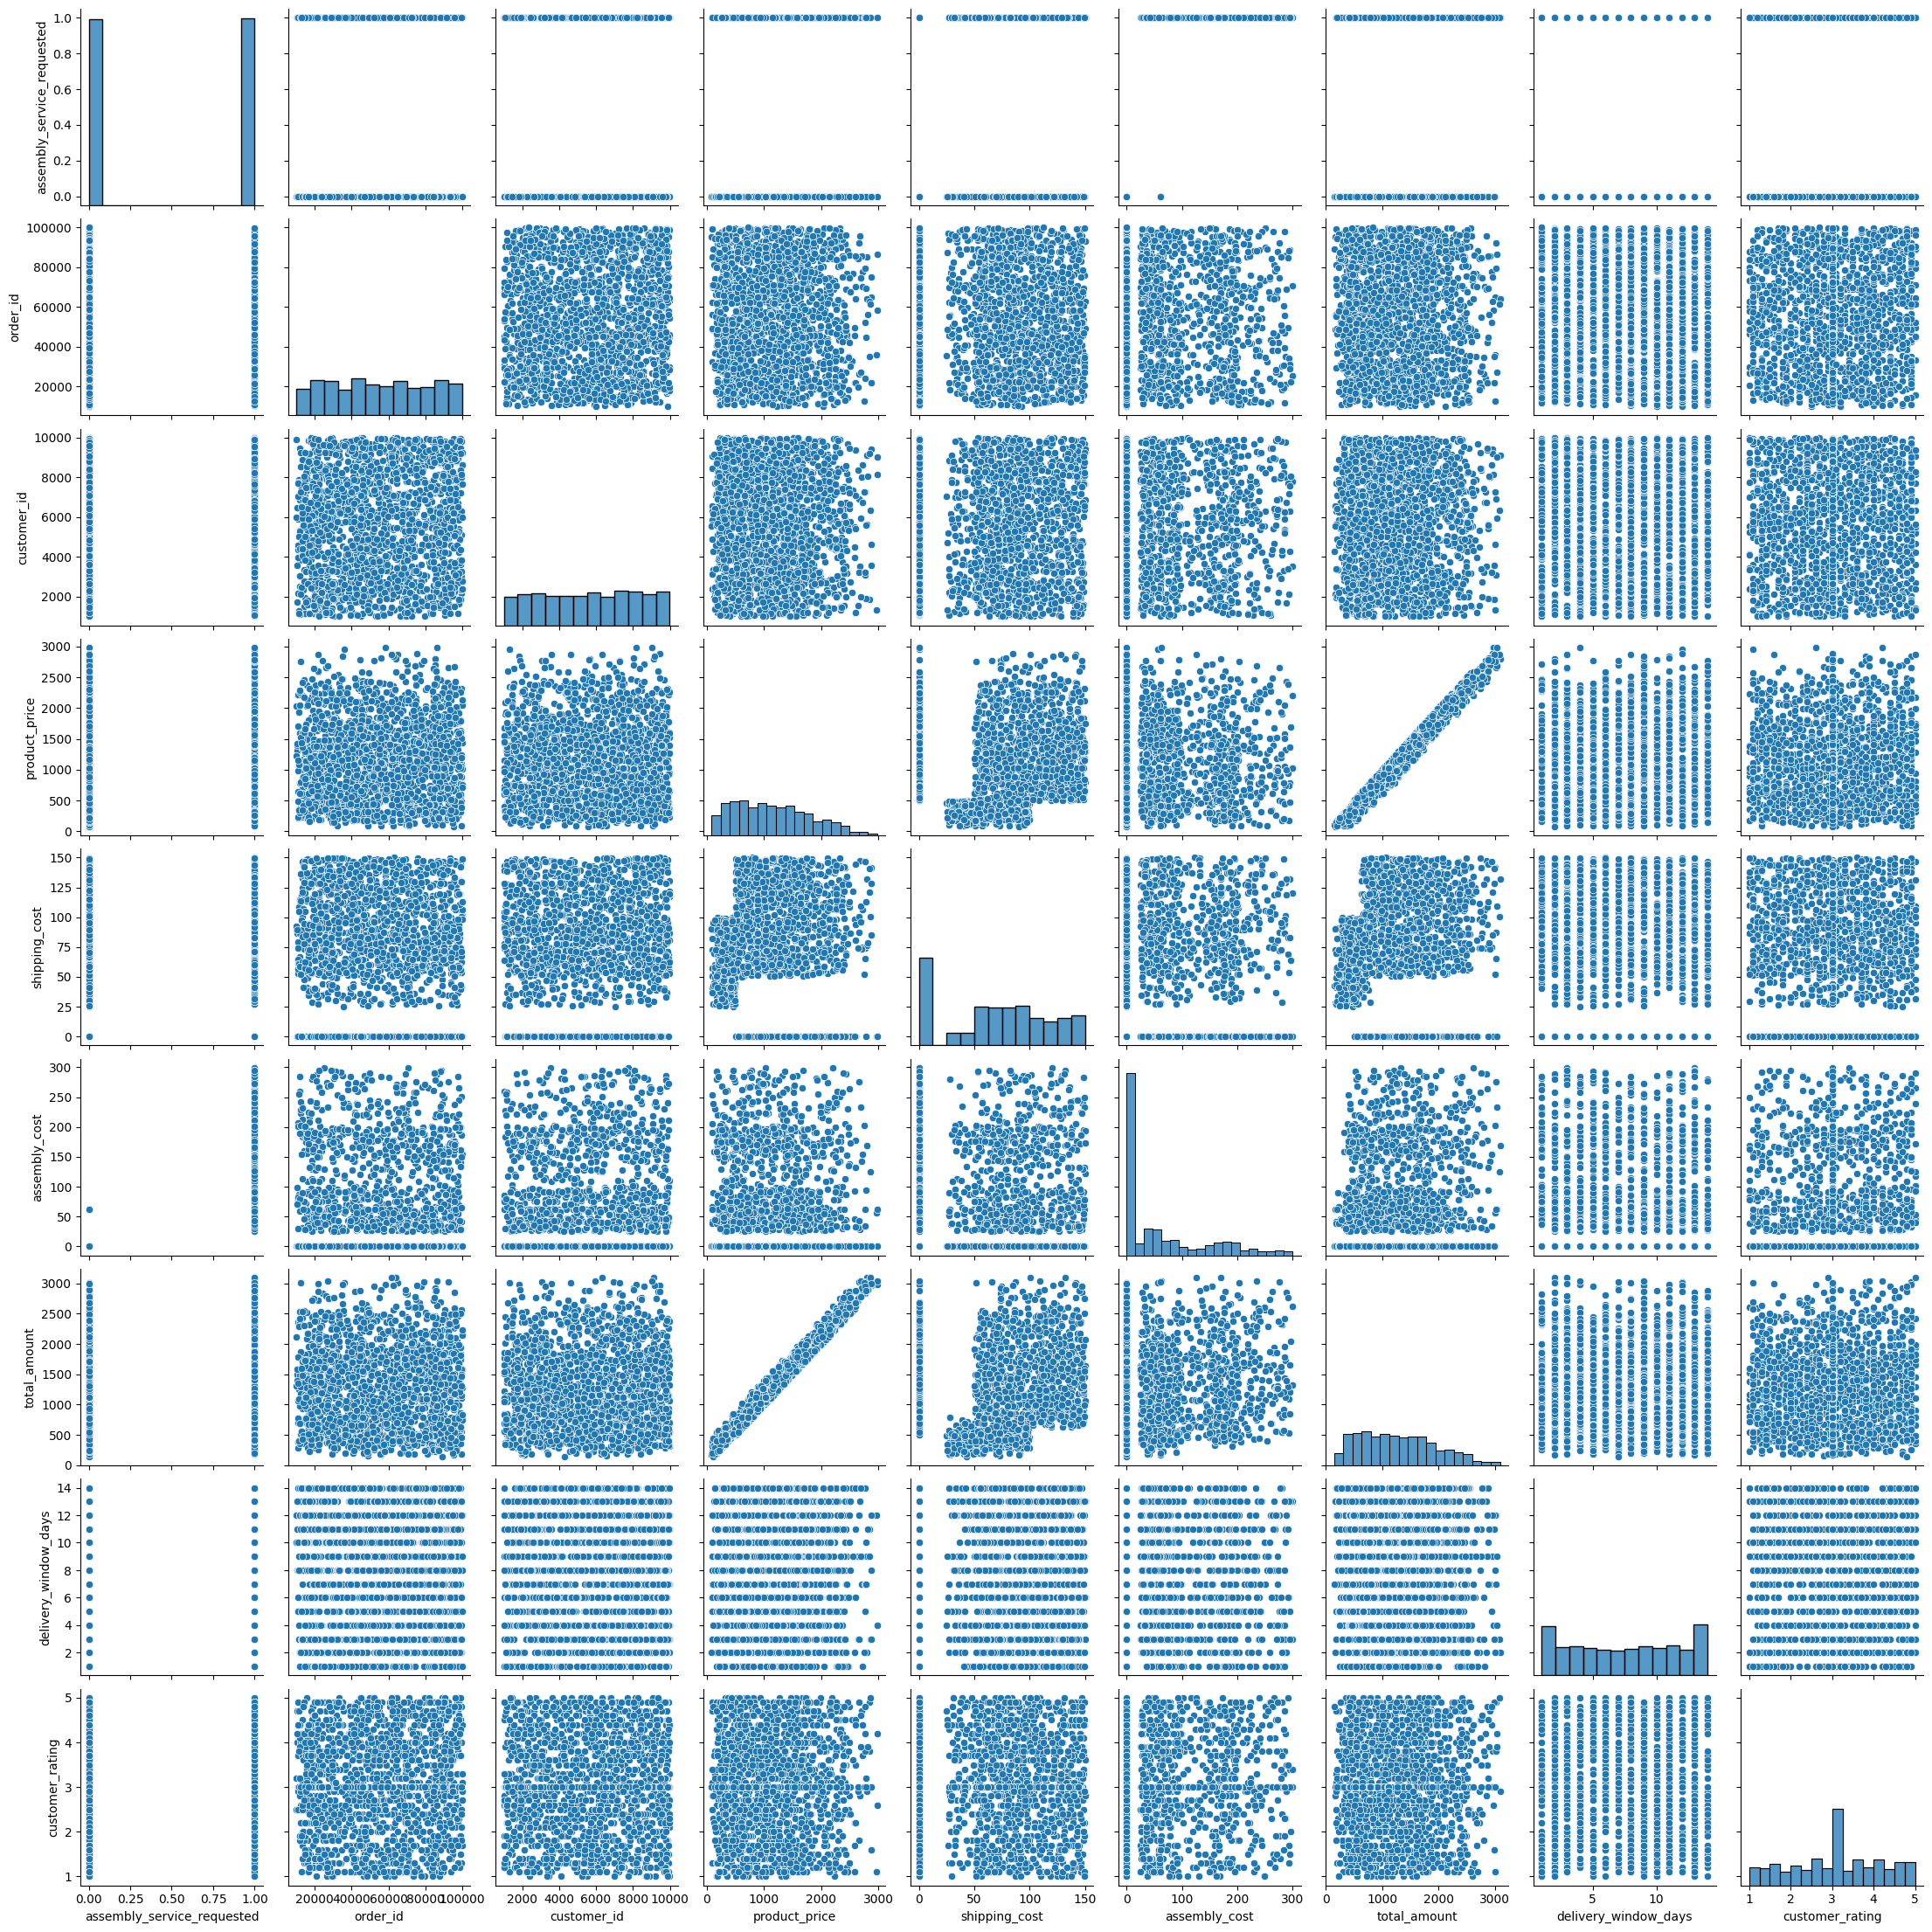

In [31]:
sns.pairplot(data=df)